<a href="https://colab.research.google.com/github/PoliNemkova/armed-conflicts-prediction/blob/main/%5B1%5D_GDELT_articles_scrapping_Sudan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Housekeeping

In [ ]:
!pip install gdelt
#!pip install newspaper
!pip install git+https://github.com/codelucas/newspaper.git
!pip install lxml_html_clean
!pip install geopandas
!pip install ipython-autotime
!pip install fiona
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.4/787.4 kB 15.0 MB/s eta 0:00:00
  Cloning https://github.com/codelucas/newspaper.git to /tmp/pip-req-build-9e7xwdwv
  Running command git clone --filter=blob:none --quiet https://github.com/codelucas/newspaper.git /tmp/pip-req-build-9e7xwdwv
  Resolved https://github.com/codelucas/newspaper.git to commit f622011177f6c2e95e48d6076561e21c016f08c3
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.8 MB/s eta 0:00:00
  

In [ ]:
from google.colab import drive  # to mount Drive to Colab notebook
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 13.7 s (started: 2024-11-12 15:35:09 +00:00)


In [ ]:
import gdelt, time
import pandas as pd
import geopandas
from datetime import datetime, timedelta
import contextlib
import io

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

gd = gdelt.gdelt()

here
time: 883 ms (started: 2024-11-12 15:35:23 +00:00)


#### Fetching the query

In [ ]:
'''
# Recording the time for processing this cell
start_time = time.time()

# Initialize the GDELT client
gdelt_client = gdelt.gdelt(version=2)

# Start date
start_date = datetime(2023, 1, 1)

# End date (30 days from the start date)
#end_date = start_date + timedelta(days=30)
end_date = datetime(2024, 1, 1)

# Initialize an empty DataFrame to store the concatenated data
all_events = pd.DataFrame()

# Desired country codes
#COUNTRY_CODES = ['SU', 'OD', 'ET', 'ER', 'DJ', 'SO', 'UG', 'KE']
COUNTRY_CODES = ['SU']

# Desired CAMEO codes
#CAMEO_CODES = ['11','14','15','17','18','19','20'] # since GDELT is already focusing on news articles and media reports that cover events related to politics, conflict, and social issues


# Loop through each day and fetch data
current_date = start_date
while current_date <= end_date:
    # Convert current date to string format
    #current_date_str = current_date.strftime('%Y %b %d')
    current_date_str = current_date.strftime('%Y%m%d')


    # Search for events on the current date
    missing_dates = []
    try:
        with contextlib.redirect_stdout(io.StringIO()):
          events = gdelt_client.Search([current_date_str], table='events', output='gpd', normcols=True, coverage=False)
          #print('hi')
    except:
        missing_dates.append(current_date_str)
        #print('not hi')

    # Filter events based on country codes
    filtered_events = events[
        (events['actor1geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor1countrycode'].isin(COUNTRY_CODES)) |
        (events['actor2geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor2countrycode'].isin(COUNTRY_CODES)) |
        (events['actiongeocountrycode'].isin(COUNTRY_CODES)) &
        (events['sqldate'] >= 20230101) & (events['sqldate'] <= 20231231)
        #&&
        #(events['eventcode'].isin(CAMEO_CODES))
    ]

    # Concatenate the filtered events data to the all_events DataFrame
    all_events = pd.concat([all_events, filtered_events], ignore_index=True)

    # Move to the next day
    current_date += timedelta(days=1)

# Save the concatenated filtered data to a single CSV file
all_events.to_csv('filtered_events.csv', index=False)



#DATABASE_NAME = 'horn_africa_forecast'
#GDELT_EVENTS = 'gdelt_events'
#all_events['geometry'] = all_events['geometry'].astype(str)
#s = spark.createDataFrame(all_events)
#s.write.mode('overwrite').format('delta').saveAsTable("{}.{}".format(DATABASE_NAME, GDELT_EVENTS))


all_events.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_events_year2023.csv')
end_time = time.time()


# Print info
print('====> Finished processing after:', round((end_time - start_time) / 60, 2), 'minutes.')
print('GDELT querying complete at: ', current_time, '\n')
print('Length of the fetched file: ', len(all_events))
'''

'\n# Recording the time for processing this cell\nstart_time = time.time()\n\n# Initialize the GDELT client\ngdelt_client = gdelt.gdelt(version=2)\n\n# Start date\nstart_date = datetime(2023, 1, 1)\n\n# End date (30 days from the start date)\n#end_date = start_date + timedelta(days=30)\nend_date = datetime(2024, 1, 1)\n\n# Initialize an empty DataFrame to store the concatenated data\nall_events = pd.DataFrame()\n\n# Desired country codes\n#COUNTRY_CODES = [\'SU\', \'OD\', \'ET\', \'ER\', \'DJ\', \'SO\', \'UG\', \'KE\']\nCOUNTRY_CODES = [\'SU\']\n\n# Desired CAMEO codes\n#CAMEO_CODES = [\'11\',\'14\',\'15\',\'17\',\'18\',\'19\',\'20\'] # since GDELT is already focusing on news articles and media reports that cover events related to politics, conflict, and social issues\n\n\n# Loop through each day and fetch data\ncurrent_date = start_date\nwhile current_date <= end_date:\n    # Convert current date to string format\n    #current_date_str = current_date.strftime(\'%Y %b %d\')\n    curren

time: 3.04 ms (started: 2024-11-08 02:03:44 +00:00)


In [ ]:
# load data if no need to re-queriyng

all_events = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_events_year2023.csv')
texts = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_year2023_gdelt_articles_texts.csv')

time: 789 ms (started: 2024-11-12 15:35:31 +00:00)


In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import gdelt
import contextlib
import io

start_time = time.time()

# Initialize the GDELT client
gdelt_client = gdelt.gdelt(version=2)

# Define start and end dates for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)

# Initialize an empty DataFrame
all_events = pd.DataFrame()

# Set desired country codes for filtering
COUNTRY_CODES = ['SU']

# Loop through each month
current_date = start_date
while current_date < end_date:
    next_month = current_date + timedelta(days=30)  # Approximate monthly step
    current_date_str = current_date.strftime('%Y%m%d')
    next_month_str = next_month.strftime('%Y%m%d')

    try:
        # Query for events within the month
        with contextlib.redirect_stdout(io.StringIO()):
            events = gdelt_client.Search(
                [current_date_str, next_month_str],
                table='events',
                output='gpd',
                normcols=True,
                coverage=False
            )
    except:
        print(f"Data missing for month starting on {current_date_str}")
        current_date = next_month
        continue

    # Filter for Sudan events
    filtered_events = events[
        (events['actor1geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor1countrycode'].isin(COUNTRY_CODES)) |
        (events['actor2geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor2countrycode'].isin(COUNTRY_CODES)) |
        (events['actiongeocountrycode'].isin(COUNTRY_CODES))
    ]

    # Concatenate filtered events to the main DataFrame
    all_events = pd.concat([all_events, filtered_events], ignore_index=True)

    # Advance to the next month
    current_date = next_month

# Save data to CSV
all_events.to_csv('Sudan_events_year2023[v2].csv', index=False)

all_events.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_events_year2023_v2.csv')
end_time = time.time()

# Print info
print('====> Finished processing after:', round((end_time - start_time) / 60, 2), 'minutes.')
print('GDELT querying complete at: ', current_time, '\n')
print('Length of the fetched file: ', len(all_events))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>'

Data missing for month starting on 20230401


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20230501


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20230531


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20230630


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20230730


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20230829


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20230928


Process ForkPoolWorker-140:
Process ForkPoolWorker-139:
Process ForkPoolWorker-144:
Process ForkPoolWorker-141:
Process ForkPoolWorker-133:
Process ForkPoolWorker-137:
Process ForkPoolWorker-136:
Process ForkPoolWorker-135:
Process ForkPoolWorker-134:
Process ForkPoolWorker-143:
Process ForkPoolWorker-138:
Process ForkPoolWorker-142:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line

Data missing for month starting on 20231028


  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py", line 70, in _mp_worker
    r = requests.get(url, proxies=proxies, timeout=5)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/requests/api.py", line 73, in get
    return request("get", url, params=params, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py", line 70, in _mp_worker
    r = requests.get(url, proxies=proxies, timeout=5)
  File "/usr/local/lib/python3.10/dist-packages/requests/api.py", line 59, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/api.py", line 73, in get
    return request("get", url, params=params, **kwargs)
  File "/usr/local/lib/python3.10/

Data missing for month starting on 20231127


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data missing for month starting on 20231227
====> Finished processing after: 0.2 minutes.
GDELT querying complete at:  01:56:47 

Length of the fetched file:  94
time: 12.1 s (started: 2024-11-08 02:03:45 +00:00)


In [ ]:
len(all_events)

1820

time: 2.34 ms (started: 2024-11-12 15:36:06 +00:00)


In [ ]:
all_events['globaleventid'].nunique()

1721

time: 4.98 ms (started: 2024-11-12 15:36:14 +00:00)


In [ ]:
# Identify duplicates based on 'globaleventid'
duplicate_rows = all_events[all_events['globaleventid'].duplicated(keep=False)]

duplicate_rows

,Unnamed: 0,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,...,actiongeofullname,actiongeocountrycode,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry
65,65,1087496470,20230131,202301,2023,2023.0849,GOV,MINIST OF FINANCE,NaN,NaN,...,Sudan,SU,SU,NaN,16.0000,30.0000,SU,20230302234500,https://www.eyeradio.org/bank-accounts-not-man...,POINT (30 16)
66,66,1087496655,20230302,202303,2023,2023.1699,BUS,MERCHANT,NaN,NaN,...,"Akuany, Janub Kurdufan, Sudan",SU,SU50,37116,9.6231,28.9313,10754238,20230302234500,https://www.dailymail.co.uk/home/books/article...,POINT (28.9313 9.6231)
67,67,1087496885,20230302,202303,2023,2023.1699,EDU,SCHOOL,NaN,NaN,...,Sudan,SU,SU,NaN,16.0000,30.0000,SU,20230302234500,https://www.eyeradio.org/bank-accounts-not-man...,POINT (30 16)
68,68,1087497266,20230302,202303,2023,2023.1699,OPP,DISSENTER,NaN,NaN,...,"Akuany, Janub Kurdufan, Sudan",SU,SU50,37116,9.6231,28.9313,10754238,20230302234500,https://www.dailymail.co.uk/home/books/article...,POINT (28.9313 9.6231)
69,69,1087496470,20230131,202301,2023,2023.0849,GOV,MINIST OF FINANCE,NaN,NaN,...,Sudan,SU,SU,NaN,16.0000,30.0000,SU,20230302234500,https://www.eyeradio.org/bank-accounts-not-man...,POINT (30 16)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1695,1148580246,20231227,202312,2023,2023.9781,UGAGOV,YOWERI MUSEVENI,UGA,NaN,...,Sudan,SU,SU,NaN,16.0000,30.0000,SU,20231227234500,https://radiotamazuj.org/en/news/article/sudan...,POINT (30 16)
1696,1696,1148580241,20231227,202312,2023,2023.9781,UGA,UGANDA,UGA,NaN,...,Uganda,UG,UG,NaN,2.0000,33.0000,UG,20231227234500,https://radiotamazuj.org/en/news/article/sudan...,POINT (33 2)
1697,1697,1148580243,20231227,202312,2023,2023.9781,UGAGOV,YOWERI MUSEVENI,UGA,NaN,...,Sudan,SU,SU,NaN,16.0000,30.0000,SU,20231227234500,https://radiotamazuj.org/en/news/article/sudan...,POINT (30 16)
1698,1698,1148580244,20231227,202312,2023,2023.9781,UGAGOV,YOWERI MUSEVENI,UGA,NaN,...,Uganda,UG,UG,NaN,2.0000,33.0000,UG,20231227234500,https://radiotamazuj.org/en/news/article/sudan...,POINT (33 2)


time: 35.1 ms (started: 2024-11-12 15:36:21 +00:00)


In [ ]:
len(all_events)

1820

time: 2.3 ms (started: 2024-11-12 15:36:24 +00:00)


In [ ]:
len(duplicate_rows)

198

time: 2.81 ms (started: 2024-11-12 15:36:25 +00:00)


In [ ]:
all_events.drop_duplicates(subset='globaleventid', keep='first', inplace=True)

time: 3 ms (started: 2024-11-12 15:36:38 +00:00)


In [ ]:
len(all_events)

1721

time: 1.96 ms (started: 2024-11-12 15:36:39 +00:00)


In [ ]:
all_events['year'].unique()

array([2023, 2022, 2024])

time: 2.78 ms (started: 2024-11-12 15:36:42 +00:00)


In [ ]:
all_events['year'].value_counts()

,count
year,
2023,1609
2024,105
2022,7


time: 7.88 ms (started: 2024-11-12 15:36:45 +00:00)


In [ ]:
all_events['actiongeoadm1code'].nunique()

102

time: 3.46 ms (started: 2024-11-12 15:36:50 +00:00)


In [ ]:
print(all_events['actiongeoadm1code'].unique())

['SU' 'SU42' 'SU29' 'ET' 'SU47' 'IS05' 'OD01' 'SU43' 'CD' 'SU50' 'MR'
 'IR26' 'IS' 'SA' 'IT07' 'SF02' 'LY' 'SU41' 'IN07' 'SU36' 'CH06' 'EG11'
 'JA' 'OD' 'RS' 'IR' 'FR' 'SU53' 'CA08' 'EG' 'SU49' 'TH' 'RS48' 'DJ' 'US'
 'SA14' 'UK' 'ZI' 'IT' 'DJ00' 'SU56' 'TU25' 'EG16' 'CT14' 'SF10' 'ET45'
 'TS26' 'CE36' 'USDC' 'CY03' 'GM' 'CT' 'MO' 'SA10' 'CA' 'ZI04' 'CH' 'UP'
 'IN' 'NI24' 'NI11' 'SO' 'SU52' 'QA' 'EG06' 'NZG1' 'IN16' 'GH' 'SU39'
 'CA02' 'KE05' 'RW09' 'RP00' 'SA00' 'RPD9' 'EN01' 'NO12' 'SY' 'KE' 'CD12'
 'YM16' 'TU34' 'ML' 'VM' 'CT18' 'FR00' 'TU00' 'ER05' 'OD07' 'IS00' 'AE'
 'AO10' 'NO' 'AG' 'CG' 'SU38' 'SU55' 'CH22' 'UG' 'ET51' 'BY' 'SF']
time: 1.29 ms (started: 2024-11-12 15:36:52 +00:00)


In [ ]:
# Sudan has just 18 states, hence the other admin1s were from differet countries. Do we want to keep them?

SU_ADM1 = ['SU', 'SU42', 'SU29', 'SU47', 'SU43', 'SU50', 'SU41', 'SU36', 'SU53', 'SU56', 'SU49', 'SU39', 'SU52', 'SU38', 'SU55']
len(SU_ADM1)

15

time: 2.5 ms (started: 2024-11-08 02:03:57 +00:00)


In [ ]:
all_events['sqldate'].max()

20240123

time: 3.04 ms (started: 2024-11-12 15:36:58 +00:00)


In [ ]:
all_events.columns

Index(['globaleventid', 'sqldate', 'monthyear', 'year', 'fractiondate',
       'actor1code', 'actor1name', 'actor1countrycode', 'actor1knowngroupcode',
       'actor1ethniccode', 'actor1religion1code', 'actor1religion2code',
       'actor1type1code', 'actor1type2code', 'actor1type3code', 'actor2code',
       'actor2name', 'actor2countrycode', 'actor2knowngroupcode',
       'actor2ethniccode', 'actor2religion1code', 'actor2religion2code',
       'actor2type1code', 'actor2type2code', 'actor2type3code', 'isrootevent',
       'eventcode', 'cameocodedescription', 'eventbasecode', 'eventrootcode',
       'quadclass', 'goldsteinscale', 'nummentions', 'numsources',
       'numarticles', 'avgtone', 'actor1geotype', 'actor1geofullname',
       'actor1geocountrycode', 'actor1geoadm1code', 'actor1geoadm2code',
       'actor1geolat', 'actor1geolong', 'actor1geofeatureid', 'actor2geotype',
       'actor2geofullname', 'actor2geocountrycode', 'actor2geoadm1code',
       'actor2geoadm2code', 'actor2geo

time: 2.91 ms (started: 2024-11-08 02:03:57 +00:00)


In [ ]:
all_events['sourceurl'].iloc[69]

'https://learningenglish.voanews.com/a/in-ethiopia-s-tigray-children-return-to-school-but-trauma-remains/6995762.html'

time: 2.58 ms (started: 2024-11-12 15:39:24 +00:00)


In [ ]:
all_events['sourceurl'].isna().value_counts()

,count
sourceurl,
False,1721


time: 4.8 ms (started: 2024-11-12 15:37:11 +00:00)


In [ ]:
all_events = all_events.reset_index()

time: 2.5 ms (started: 2024-11-12 16:34:20 +00:00)


In [ ]:
len(all_events)

1721

time: 2.28 ms (started: 2024-11-12 16:34:37 +00:00)


In [ ]:
all_events['globaleventid'].nunique()

1721

time: 3.68 ms (started: 2024-11-12 16:35:00 +00:00)


### scrapping

In [ ]:
# scrapping

# Recording the time for processing this cell
start_time = time.time()

from newspaper import Article

articles = []
ids = []
dates = []
for i in range(len(all_events)):
    url = all_events['sourceurl'][i]
    id = all_events['globaleventid'][i]
    date = all_events['sqldate'][i]
    article = Article(url)
    try:
        article.download()
        article.parse()
        article_text = article.text
        articles.append(article_text)
        ids.append(id)
        dates.append(date)
    except:
        continue

texts = pd.DataFrame(zip(dates, ids, articles))

texts.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_year2023_gdelt_articles_texts.csv')


# Print info
end_time = time.time()
print('====> Finished processing after:', round((end_time - start_time) / 60, 2), 'minutes.')
print('GDELT querying complete at: ', current_time, '\n')
print('Number of scrapped articles: ', len(texts), 'comparing to total events length: ', len(all_events))

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


====> Finished processing after: 17.63 minutes.
GDELT querying complete at:  15:35:24 

Number of scrapped articles:  1412 comparing to total events length:  1721
time: 17min 37s (started: 2024-11-12 16:04:48 +00:00)


In [ ]:
# check whether events were duplicated
texts[1].nunique()

1412

time: 3.4 ms (started: 2024-11-12 16:35:46 +00:00)


In [ ]:
# check how many articles were unique
texts[2].nunique()

250

time: 10.6 ms (started: 2024-11-12 16:36:09 +00:00)


In [ ]:
# texts = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_year2023_gdelt_articles_texts.csv')
texts

,0,1,2
0,20230104,1078771985,Sudan’s mineral resources company has announce...
1,20230104,1078772253,Sudan’s mineral resources company has announce...
2,20230113,1080098680,Atrocity Alert is a weekly publication by the ...
3,20230113,1080098704,Atrocity Alert is a weekly publication by the ...
4,20230113,1080098737,Atrocity Alert is a weekly publication by the ...
...,...,...,...
1407,20240123,1153385487,Sudanese authorities should investigate report...
1408,20240123,1153385488,Sudanese authorities should investigate report...
1409,20240123,1153385489,Sudanese authorities should investigate report...
1410,20240123,1153385490,Sudanese authorities should investigate report...


time: 47.4 ms (started: 2024-11-12 16:36:11 +00:00)


In [ ]:
(texts[2].str.len() < 100).sum()

110

time: 4.96 ms (started: 2024-11-12 16:36:25 +00:00)


In [ ]:
# Drop rows where the length of text in column 1 is less than 100 characters
texts = texts[texts[2].str.len() >= 100].reset_index(drop=True)

time: 2.86 ms (started: 2024-11-12 16:36:39 +00:00)


In [ ]:
texts[2].nunique()

248

time: 10.8 ms (started: 2024-11-12 16:36:46 +00:00)


In [ ]:
texts.rename(columns={0: 'date', 1: 'globaleventid', 2: 'text'}, inplace=True)
sudan_2023 = pd.merge(all_events, texts[['globaleventid', 'text']], on='globaleventid', how='left')
len(sudan_2023)

1721

time: 12.6 ms (started: 2024-11-12 16:38:57 +00:00)


In [ ]:
sudan_2023['globaleventid'].nunique()

1721

time: 3.12 ms (started: 2024-11-12 16:39:19 +00:00)


In [ ]:
# Convert 'sqldate' column to datetime if necessary
#sudan_2023['sqldate'] = pd.to_datetime(sudan_2023['sqldate'], errors='coerce')

# Sort the DataFrame by 'sqldate'
sudan_2023 = sudan_2023.sort_values(by='sqldate')
sudan_2023 = sudan_2023.drop(columns=['level_0', 'index', 'Unnamed: 0'])
sudan_2023 = sudan_2023.reset_index()

time: 3.17 ms (started: 2024-11-12 16:42:22 +00:00)


In [ ]:
len(sudan_2023)

1721

time: 2.07 ms (started: 2024-11-12 16:44:30 +00:00)


In [ ]:
# Ensure that 'sqldate' is treated as a string or a datetime type
sudan_2023['sqldate'] = pd.to_datetime(sudan_2023['sqldate'], format='%Y%m%d')

# Filter the DataFrame based on the date
sudan_2023 = sudan_2023[sudan_2023['sqldate'] >= '2023-01-01']

# Check the length of the filtered DataFrame
len(sudan_2023)

1714

time: 8.47 ms (started: 2024-11-12 16:46:45 +00:00)


In [ ]:
sudan_2023.iloc[50:60]

,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,...,actiongeocountrycode,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text
54,1085676283,2023-02-19,202302,2023,2023.1342,SDN,SUDANESE,SDN,NaN,NaN,...,SU,SU43,37092,18.46670,31.8167,-11914,20230219234500,https://en.qantara.de:443/content/egypt-expedi...,POINT (31.8167 18.4667),NaN
63,1085675962,2023-02-19,202302,2023,2023.1342,GOV,SPECIAL ENVOY,NaN,NaN,NaN,...,OD,OD01,37033,4.84597,31.6012,-7975,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (31.6012 4.84597),News > South Sudan's Leader Urges Sudanese Hol...
64,1085676313,2023-02-19,202302,2023,2023.1342,TCDGOV,CHAD,TCD,NaN,NaN,...,SU,SU47,37140,13.50000,23.5000,-17505,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (23.5 13.5),News > South Sudan's Leader Urges Sudanese Hol...
53,1085676281,2023-02-19,202302,2023,2023.1342,SDN,SUDANESE,SDN,NaN,NaN,...,SU,SU43,37092,18.46670,31.8167,-11914,20230219234500,https://en.qantara.de:443/content/egypt-expedi...,POINT (31.8167 18.4667),NaN
52,1085675965,2023-02-19,202302,2023,2023.1342,GOV,GOVERNMENT,NaN,NaN,NaN,...,SU,SU47,37140,13.50000,23.5000,-17505,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (23.5 13.5),News > South Sudan's Leader Urges Sudanese Hol...
55,1085676285,2023-02-19,202302,2023,2023.1342,SDN,SUDAN,SDN,NaN,NaN,...,SU,SU47,37140,13.50000,23.5000,-17505,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (23.5 13.5),News > South Sudan's Leader Urges Sudanese Hol...
58,1085676288,2023-02-19,202302,2023,2023.1342,SDN,DARFUR,SDN,NaN,NaN,...,SU,SU47,37140,13.50000,23.5000,-17505,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (23.5 13.5),News > South Sudan's Leader Urges Sudanese Hol...
61,1085676291,2023-02-19,202302,2023,2023.1342,SDN,SUDAN,SDN,NaN,NaN,...,SU,SU47,37140,13.50000,23.5000,-17505,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (23.5 13.5),News > South Sudan's Leader Urges Sudanese Hol...
59,1085676289,2023-02-19,202302,2023,2023.1342,SDN,DARFUR,SDN,NaN,NaN,...,OD,OD01,37033,4.84597,31.6012,-7975,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (31.6012 4.84597),News > South Sudan's Leader Urges Sudanese Hol...
62,1085676292,2023-02-19,202302,2023,2023.1342,SDNSEP,SUDAN LIBERATION MOVEMENT,SDN,NaN,NaN,...,SU,SU47,37140,13.50000,23.5000,-17505,20230219234500,https://en.haberler.com/south-sudan-s-leader-u...,POINT (23.5 13.5),News > South Sudan's Leader Urges Sudanese Hol...


time: 19.8 ms (started: 2024-11-12 16:47:04 +00:00)


In [ ]:
sudan_2023 = sudan_2023.dropna(subset=['text'])
len(sudan_2023)

1298

time: 9.3 ms (started: 2024-11-12 16:51:20 +00:00)


### encodings

In [ ]:
# encoddings

#!pip install transformers sentence-transformers torch

from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from sentence_transformers import SentenceTransformer, util
import torch

# Load the pre-trained SimCSE model
model_name = 'princeton-nlp/sup-simcse-bert-base-uncased'
model = SentenceTransformer(model_name)


articles = sudan_2023['text'].to_list()

# Encode the articles
embeddings = model.encode(articles)


print("Embeddings shape:", embeddings.shape)

sudan_2023['embeddings'] = list(embeddings)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Embeddings shape: (1298, 768)
time: 8.34 s (started: 2024-11-12 16:51:38 +00:00)


In [ ]:
sudan_2023['embeddings'] = list(embeddings)

time: 1.42 ms (started: 2024-11-12 16:53:40 +00:00)


In [ ]:
sudan_2023.head(10)

,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,...,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings
8,1078772253,2023-01-04,202301,2023,2023.0110,USAGOV,US OFFICIAL,USA,NaN,NaN,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,"[-0.07328434, 0.4681924, -0.05935436, -0.40470..."
7,1078771985,2023-01-04,202301,2023,2023.0110,SDN,SUDANESE,SDN,NaN,NaN,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,"[-0.07328434, 0.4681924, -0.05935436, -0.40470..."
19,1080099234,2023-01-13,202301,2023,2023.0356,SDN,SUDAN,SDN,NaN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
20,1080099446,2023-01-13,202301,2023,2023.0356,hau,HAUSA,NaN,NaN,hau,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
21,1080099238,2023-01-13,202301,2023,2023.0356,SDNGOV,SUDANESE,SDN,NaN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
22,1080099448,2023-01-13,202301,2023,2023.0356,hau,HAUSA,NaN,NaN,hau,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
23,1080099447,2023-01-13,202301,2023,2023.0356,hau,HAUSA,NaN,NaN,hau,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
17,1080099237,2023-01-13,202301,2023,2023.0356,SDN,SUDAN,SDN,NaN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
18,1080099235,2023-01-13,202301,2023,2023.0356,SDN,SUDANESE,SDN,NaN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."
16,1080099075,2023-01-13,202301,2023,2023.0356,IGOUNO,THE UN,NaN,UNO,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,"[0.19745873, 0.1118452, -0.19030426, -0.555166..."


time: 27.2 ms (started: 2024-11-12 16:53:41 +00:00)


In [ ]:
sudan_2023.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/Fall 2024/sudan_2023_events+text+enc.csv')

time: 6.53 s (started: 2024-11-12 16:57:34 +00:00)


## all the rest was moved to a separate notebook: https://colab.research.google.com/drive/1hLCcNN-iU-V3DwsPv6KYlj390GM-eNYA?usp=sharing

In [ ]:
# Calculate cosine similarity between articles

similarities = util.cos_sim(embeddings, embeddings)
print("Cosine Similarity Matrix:")
print(similarities)


Cosine Similarity Matrix:
tensor([[1.0000, 0.7280, 0.3991, 0.7532, 0.8053, 0.8069, 0.7685, 0.7622, 0.8385,
         0.7547, 0.8325, 0.7128, 0.7118, 0.7869, 0.7889],
        [0.7280, 1.0000, 0.3008, 0.7109, 0.7681, 0.6911, 0.6704, 0.7322, 0.7746,
         0.7471, 0.7390, 0.7787, 0.7509, 0.8143, 0.7071],
        [0.3991, 0.3008, 1.0000, 0.3940, 0.3362, 0.3462, 0.4001, 0.3044, 0.3345,
         0.3506, 0.3134, 0.3379, 0.3889, 0.3578, 0.3660],
        [0.7532, 0.7109, 0.3940, 1.0000, 0.6940, 0.7178, 0.6831, 0.7239, 0.6937,
         0.6597, 0.6579, 0.6473, 0.7716, 0.7314, 0.7315],
        [0.8053, 0.7681, 0.3362, 0.6940, 1.0000, 0.8247, 0.7867, 0.8268, 0.7707,
         0.7560, 0.7712, 0.8428, 0.7548, 0.8002, 0.7943],
        [0.8069, 0.6911, 0.3462, 0.7178, 0.8247, 1.0000, 0.8173, 0.8936, 0.7346,
         0.7229, 0.7974, 0.7407, 0.7425, 0.7842, 0.6842],
        [0.7685, 0.6704, 0.4001, 0.6831, 0.7867, 0.8173, 1.0000, 0.7684, 0.6984,
         0.6778, 0.7289, 0.7121, 0.7284, 0.7354, 0.7281],
 

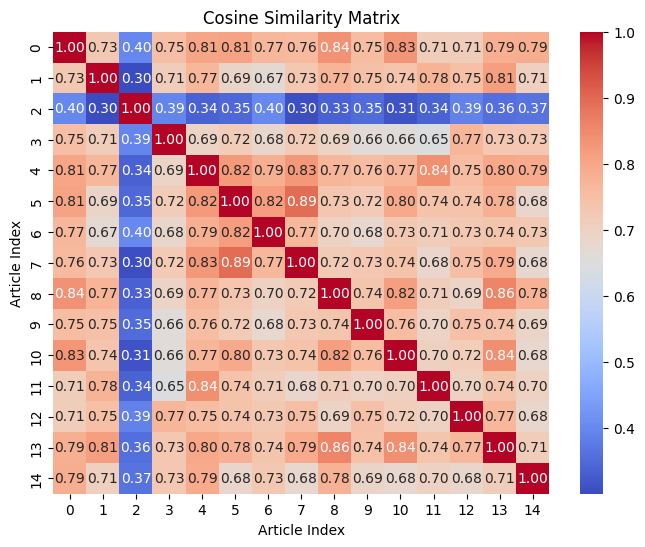

time: 639 ms (started: 2024-11-08 03:34:39 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the tensor to a numpy array (if it's still a tensor)
similarities = similarities.cpu().numpy()

plt.figure(figsize=(8, 6))
sns.heatmap(similarities, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cosine Similarity Matrix")
plt.xlabel("Article Index")
plt.ylabel("Article Index")
plt.show()


###### trying clustering

In [ ]:
!pip install scikit-learn matplotlib seaborn

time: 2.52 s (started: 2024-11-08 03:36:34 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure embeddings is a NumPy array
embeddings = np.array(embeddings)

# Check the shape of the embeddings
print(f"Embeddings shape: {embeddings.shape}")


Embeddings shape: (15, 768)
time: 513 ms (started: 2024-11-08 03:37:02 +00:00)


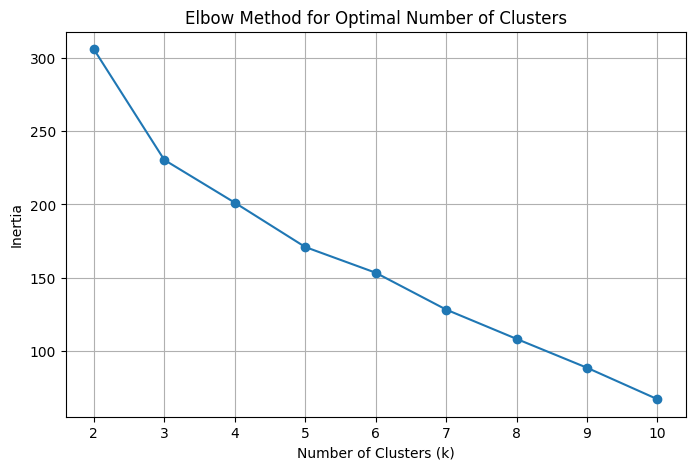

time: 253 ms (started: 2024-11-08 03:37:14 +00:00)


In [ ]:
# Elbow method to find the optimal number of clusters
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Perform K-means clustering with the chosen number of clusters
k = 5  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Add the cluster labels to your DataFrame
#sudan_w_acled['cluster'] = clusters


time: 5.76 ms (started: 2024-11-08 03:39:46 +00:00)


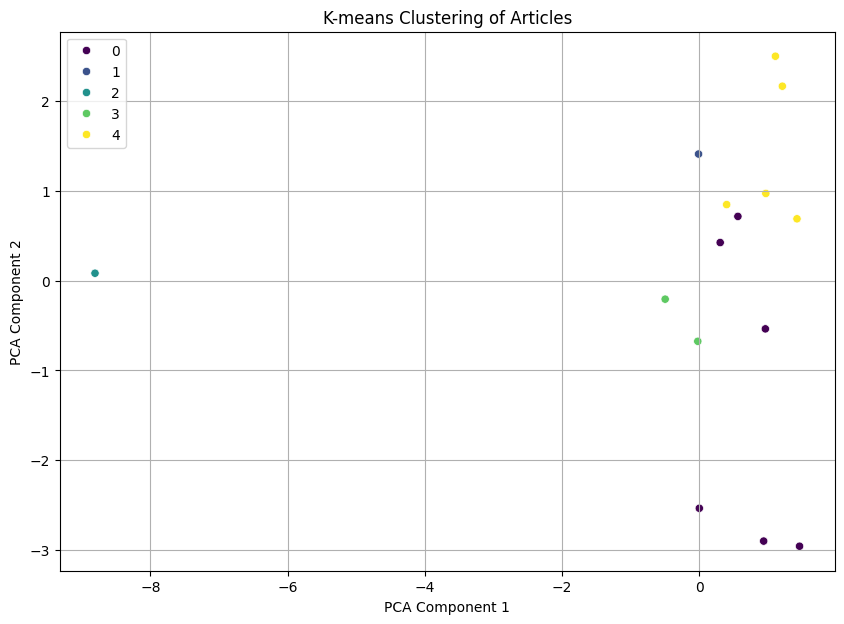

time: 241 ms (started: 2024-11-08 03:39:48 +00:00)


In [ ]:
from sklearn.decomposition import PCA

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=clusters,
    palette='viridis',
    legend='full'
)
plt.title("K-means Clustering of Articles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
silhouette_avg = silhouette_score(embeddings, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.05
time: 3.64 ms (started: 2024-11-08 03:40:24 +00:00)


In [ ]:
from sklearn.metrics import silhouette_score

best_k = None
best_score = -1

for k in range(2, 11):  # Try different values for k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, clusters)
    print(f"Silhouette Score for k={k}: {score:.2f}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"Best k: {best_k} with a Silhouette Score of {best_score:.2f}")


Silhouette Score for k=2: 0.07
Silhouette Score for k=3: 0.04
Silhouette Score for k=4: 0.04
Silhouette Score for k=5: 0.05
Silhouette Score for k=6: 0.04
Silhouette Score for k=7: 0.05
Silhouette Score for k=8: 0.02
Silhouette Score for k=9: 0.04
Silhouette Score for k=10: 0.05
Best k: 2 with a Silhouette Score of 0.07
time: 65.6 ms (started: 2024-11-08 03:42:30 +00:00)


In [ ]:
sudan_2023.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_2023_gdelt_articles_merged.csv')

time: 420 ms (started: 2024-11-08 02:50:33 +00:00)


#### loading ACLED features

In [ ]:
# loading ACLED
acled = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/Fall 2024/acled_bin_all_countries_since_2015.csv')
acled.head(10)

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
0,Afghanistan,271,2020-01-13,2020-01-20,-1478.0,-8.450543e+01,0
1,Afghanistan,796,2020-09-14,2020-09-21,525.0,1.937269e+02,1
2,Afghanistan,17,2022-12-12,2022-12-19,-779.0,-9.786432e+01,0
3,Afghanistan,17,2023-04-17,2023-04-24,0.0,0.000000e+00,0
4,Afghanistan,14,2023-05-15,2023-05-22,-3.0,-1.764706e+01,0
5,Albania,0,2021-06-14,2021-06-21,0.0,0.000000e+00,0
6,Albania,0,2019-01-07,2019-01-14,0.0,0.000000e+00,0
7,Albania,0,2020-08-31,2020-09-07,0.0,0.000000e+00,0
8,Algeria,0,2018-09-24,2018-10-01,0.0,0.000000e+00,0
9,Algeria,1,2020-05-18,2020-05-25,1.0,1.000000e+12,1


time: 890 ms (started: 2024-11-08 01:58:31 +00:00)


In [ ]:
len(acled[acled['Country_Name_Short']=='Sudan'])

507

time: 8.55 ms (started: 2024-11-08 02:00:17 +00:00)


In [ ]:
acled_sudan = acled[acled['Country_Name_Short']=='Sudan']
acled_sudan

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
121,Sudan,15,2022-05-09,2022-05-16,12.0,400.000000,1
122,Sudan,135,2016-03-07,2016-03-14,120.0,800.000000,1
371,Sudan,66,2020-06-01,2020-06-08,-69.0,-51.111111,0
372,Sudan,16,2016-06-06,2016-06-13,-50.0,-75.757576,0
373,Sudan,16,2023-01-09,2023-01-16,0.0,0.000000,0
...,...,...,...,...,...,...,...
54111,Sudan,8,2021-01-04,2021-01-11,6.0,300.000000,1
54370,Sudan,48,2015-05-18,2015-05-25,40.0,500.000000,1
54371,Sudan,113,2015-04-20,2015-04-27,65.0,135.416667,1
54631,Sudan,1,2019-08-26,2019-09-02,-112.0,-99.115044,0


time: 19.8 ms (started: 2024-11-08 02:01:11 +00:00)


In [ ]:
# Step 1: Convert 'sqldate' to datetime
sudan_2023['sqldate'] = pd.to_datetime(sudan_2023['sqldate'], format='%Y%m%d')

# Step 2: Get the Monday of the week for each date
sudan_2023['week_start'] = sudan_2023['sqldate'] - pd.to_timedelta(sudan_2023['sqldate'].dt.weekday, unit='D')


time: 5.01 ms (started: 2024-11-08 02:21:00 +00:00)


In [ ]:
sudan_2023

,level_0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,...,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,week_start
0,0,0,1078771985,2023-01-04,202301,2023,2023.0110,SDN,SUDANESE,SDN,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,2023-01-02
1,1,1,1078772253,2023-01-04,202301,2023,2023.0110,USAGOV,US OFFICIAL,USA,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,2023-01-02
2,7,7,1080099077,2023-01-13,202301,2023,2023.0356,IGOUNO,THE UN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,2023-01-09
3,8,8,1080099166,2023-01-13,202301,2023,2023.0356,MIL,MILITARY,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,2023-01-09
4,9,9,1080099234,2023-01-13,202301,2023,2023.0356,SDN,SUDAN,SDN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,2023-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,89,1092422424,2023-03-30,202303,2023,2023.2466,GOV,PRESIDENT,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27
86,86,90,1092422426,2023-03-30,202303,2023,2023.2466,GOV,PRESIDENT,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27
87,87,91,1092422491,2023-03-30,202303,2023,2023.2466,IGOUNO,UNITED NATIONS,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27
88,88,92,1092422493,2023-03-30,202303,2023,2023.2466,IGOUNO,UNITED NATIONS,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27


time: 23.3 ms (started: 2024-11-08 02:21:31 +00:00)


In [ ]:
# Filter rows based on the 'STARTDATE' column
len(acled_sudan[(acled_sudan['STARTDATE'] > '2023-01-01') & (acled_sudan['STARTDATE'] < '2023-12-31')])


52

time: 4.13 ms (started: 2024-11-08 02:36:14 +00:00)


In [ ]:

sudan_2023['week_start'] = pd.to_datetime(sudan_2023['week_start'])
acled_sudan['STARTDATE'] = pd.to_datetime(acled_sudan['STARTDATE'], errors='coerce')

# Perform the merge
sudan_w_acled = pd.merge(
    sudan_2023,
    acled_sudan,
    left_on='week_start',
    right_on='STARTDATE',
    how='left'
)


time: 8.03 ms (started: 2024-11-08 03:16:22 +00:00)


<ipython-input-80-51597d553b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sudan['STARTDATE'] = pd.to_datetime(acled_sudan['STARTDATE'], errors='coerce')


In [ ]:
sudan_w_acled['globaleventid'].nunique()

90

time: 3.84 ms (started: 2024-11-08 02:36:53 +00:00)


In [ ]:
len(sudan_w_acled)

90

time: 2.62 ms (started: 2024-11-08 02:37:56 +00:00)


In [ ]:
sudan_w_acled.columns

Index(['level_0', 'index', 'globaleventid', 'sqldate', 'monthyear', 'year',
       'fractiondate', 'actor1code', 'actor1name', 'actor1countrycode',
       'actor1knowngroupcode', 'actor1ethniccode', 'actor1religion1code',
       'actor1religion2code', 'actor1type1code', 'actor1type2code',
       'actor1type3code', 'actor2code', 'actor2name', 'actor2countrycode',
       'actor2knowngroupcode', 'actor2ethniccode', 'actor2religion1code',
       'actor2religion2code', 'actor2type1code', 'actor2type2code',
       'actor2type3code', 'isrootevent', 'eventcode', 'cameocodedescription',
       'eventbasecode', 'eventrootcode', 'quadclass', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone', 'actor1geotype',
       'actor1geofullname', 'actor1geocountrycode', 'actor1geoadm1code',
       'actor1geoadm2code', 'actor1geolat', 'actor1geolong',
       'actor1geofeatureid', 'actor2geotype', 'actor2geofullname',
       'actor2geocountrycode', 'actor2geoadm1code', 'actor2geoa

time: 3.21 ms (started: 2024-11-08 03:16:31 +00:00)


In [ ]:
sudan_w_acled = sudan_w_acled.sort_values(by='sqldate')

time: 2.65 ms (started: 2024-11-08 02:56:49 +00:00)


In [ ]:
# Z-score Standardization

sudan_w_acled['normalized_fatalities'] = (sudan_w_acled['sum(ACLED_Fatalities)'] - sudan_w_acled['sum(ACLED_Fatalities)'].mean()) / sudan_w_acled['sum(ACLED_Fatalities)'].std()


time: 2.03 ms (started: 2024-11-08 03:17:24 +00:00)


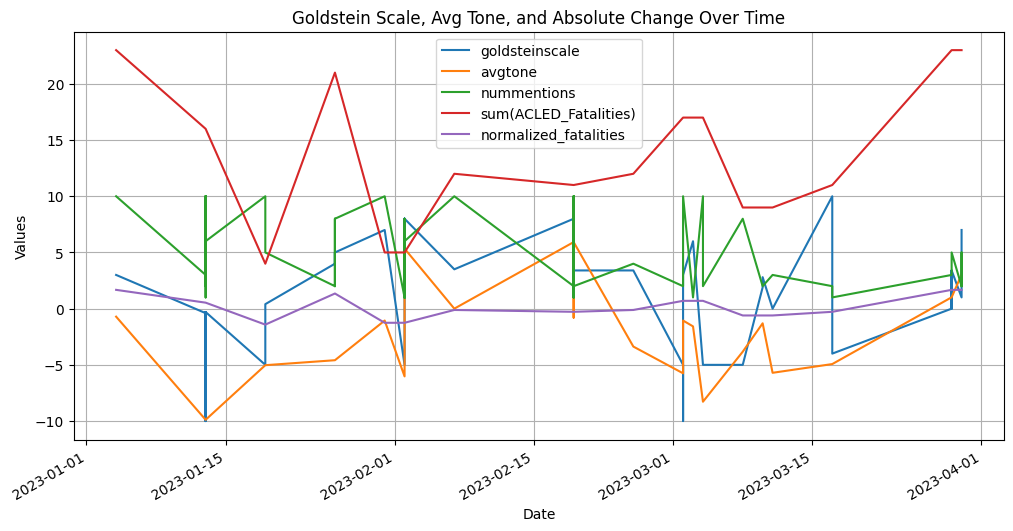

time: 311 ms (started: 2024-11-08 03:18:21 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Convert 'sqldate' to datetime if not already done
sudan_w_acled['sqldate'] = pd.to_datetime(sudan_w_acled['sqldate'])

# Set 'sqldate' as the index for better plotting
sudan_w_acled.set_index('sqldate', inplace=True)

# Plot the specified columns
sudan_w_acled[['goldsteinscale', 'avgtone', 'nummentions', 'sum(ACLED_Fatalities)', 'normalized_fatalities']].plot(figsize=(12, 6))
plt.title("Goldstein Scale, Avg Tone, and Absolute Change Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation_matrix = sudan_w_acled[['goldsteinscale', 'avgtone', 'normalized_fatalities']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                       goldsteinscale   avgtone  normalized_fatalities
goldsteinscale               1.000000  0.741077              -0.260677
avgtone                      0.741077  1.000000              -0.341744
normalized_fatalities       -0.260677 -0.341744               1.000000
time: 5.51 ms (started: 2024-11-08 03:20:38 +00:00)


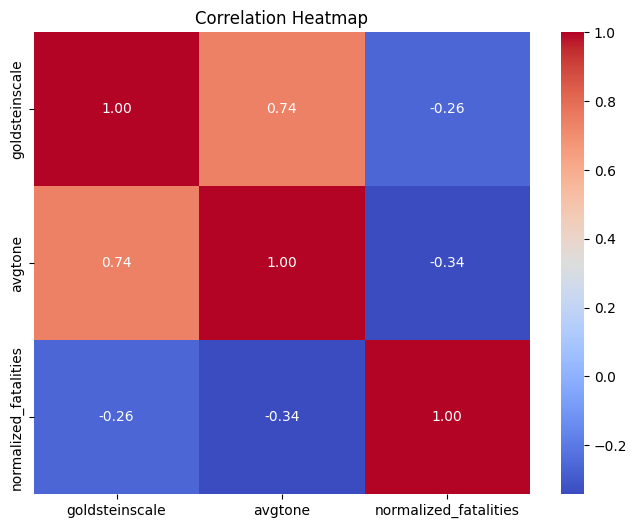

time: 194 ms (started: 2024-11-08 03:20:41 +00:00)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
